In [1]:
# Libraries 
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import random 
from yellowbrick.cluster import KElbowVisualizer

warnings.filterwarnings("ignore")

Problem Statement:
 > Objective song recommendation based on song features instead of user-biased. ??? We have to rethink about this

# TOC
- EDA of Spotify Dataset
- NetworkX Visualization and Recommendation System 
- K-means clustering and recommendation system

In [2]:
# Spotify tracks dataset (for recommendation system)
df = pd.read_csv("Data/spotify_dataset.csv", index_col=0)
df = df.dropna()

# Spotify dataset analysis V.01 - Lucia

In [3]:
df.head(5)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
print(df.shape)

(113999, 20)


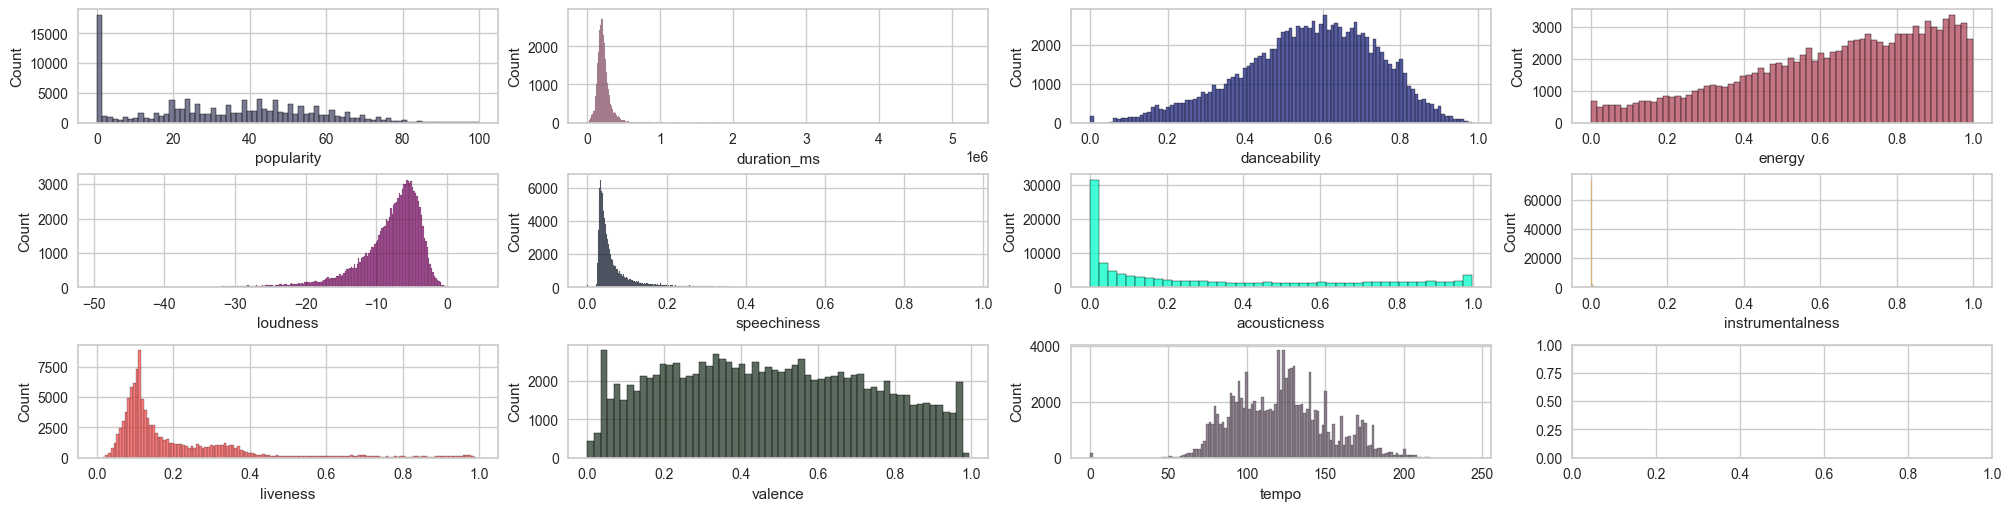

In [5]:
# First plot of numerical values
fig, axs = plt.subplots(nrows=3, ncols=4, constrained_layout=True, figsize=(20,5))
sns.histplot(ax=axs[0][0],x=df["popularity"],color="#4C4C6D")
sns.histplot(ax=axs[0][1],x=df["duration_ms"],color="#99627A")
sns.histplot(ax=axs[0][2],x=df["danceability"],color="#1D267D")
sns.histplot(ax=axs[0][3],x=df["energy"],color="#B04759")
sns.histplot(ax=axs[1][0],x=df["loudness"],color="#8B1874")
sns.histplot(ax=axs[1][1],x=df["speechiness"],color="#212A3E")
sns.histplot(ax=axs[1][2],x=df["acousticness"],color="#00FFCA")
sns.histplot(ax=axs[1][3],x=df["instrumentalness"],color="#F6BA6F")
sns.histplot(ax=axs[2][0],x=df["liveness"],color="#F45050")
sns.histplot(ax=axs[2][1],x=df["valence"],color="#263A29")
sns.histplot(ax=axs[2][2],x=df["tempo"],color="#6D5D6E")
plt.show()


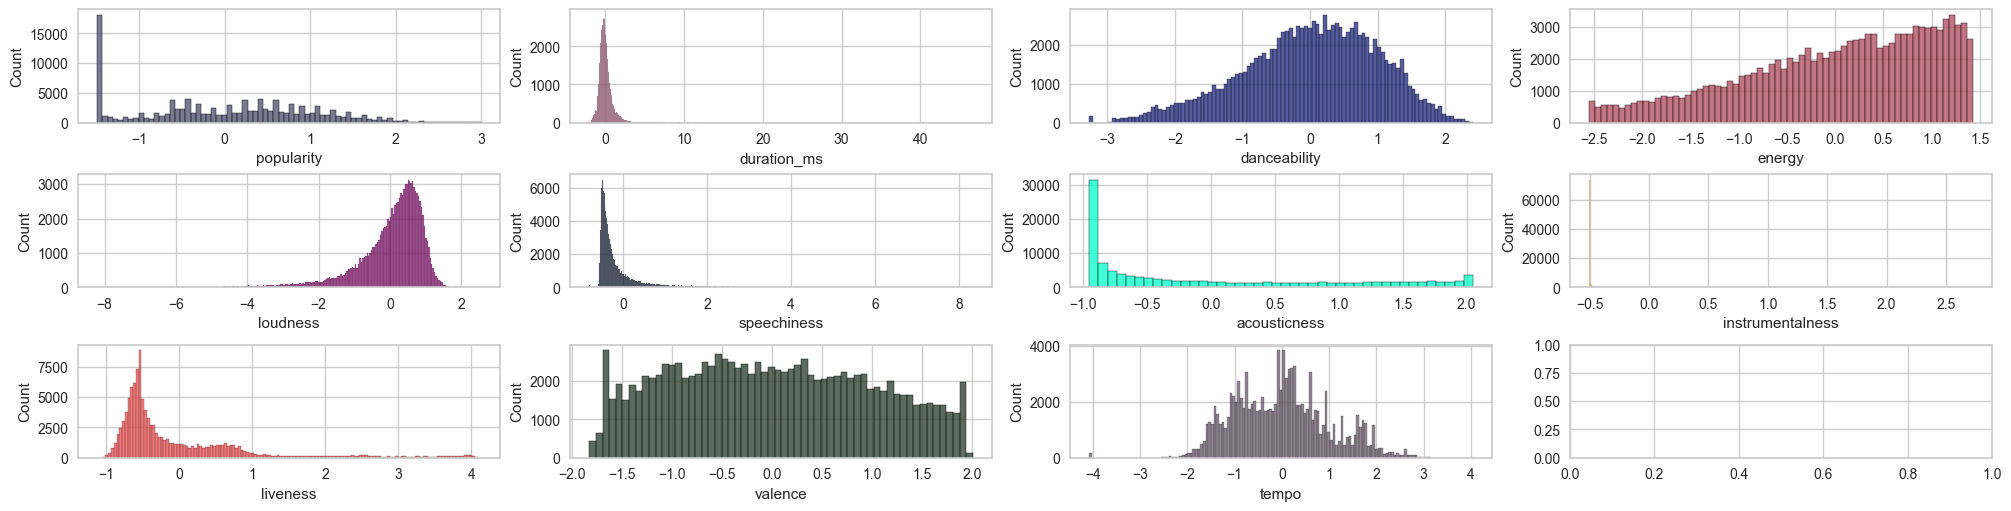

In [6]:
# Standarization of the numerical columns 
num_cols = ['popularity','duration_ms','danceability',"energy", "loudness",'speechiness','acousticness', 'instrumentalness','liveness','valence','tempo']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Plot again
fig, axs = plt.subplots(nrows=3, ncols=4, constrained_layout=True, figsize=(20,5))
sns.histplot(ax=axs[0][0],x=df["popularity"],color="#4C4C6D")
sns.histplot(ax=axs[0][1],x=df["duration_ms"],color="#99627A")
sns.histplot(ax=axs[0][2],x=df["danceability"],color="#1D267D")
sns.histplot(ax=axs[0][3],x=df["energy"],color="#B04759")
sns.histplot(ax=axs[1][0],x=df["loudness"],color="#8B1874")
sns.histplot(ax=axs[1][1],x=df["speechiness"],color="#212A3E")
sns.histplot(ax=axs[1][2],x=df["acousticness"],color="#00FFCA")
sns.histplot(ax=axs[1][3],x=df["instrumentalness"],color="#F6BA6F")
sns.histplot(ax=axs[2][0],x=df["liveness"],color="#F45050")
sns.histplot(ax=axs[2][1],x=df["valence"],color="#263A29")
sns.histplot(ax=axs[2][2],x=df["tempo"],color="#6D5D6E")
plt.show()

In [7]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1.782624,0.024557,False,0.629239,-0.717147,1,0.300825,0,0.551843,-0.850193,-0.504111,0.758735,0.929315,-1.141854,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.975625,-0.730889,False,-0.845908,-1.889974,1,-1.784739,1,-0.078995,1.831744,-0.504097,-0.591216,-0.798681,-1.489708,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1.065291,-0.160353,False,-0.742187,-1.122667,0,-0.293289,1,-0.273827,-0.315489,-0.504115,-0.507172,-1.365679,-1.528303,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1.692957,-0.243236,False,-1.733301,-2.312987,0,-2.039246,1,-0.457309,1.774605,-0.503886,-0.428381,-1.276965,1.987857,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,2.186123,-0.271942,False,0.295026,-0.788709,2,-0.282751,1,-0.303146,0.463409,-0.504115,-0.686290,-1.184394,-0.073343,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,-0.548707,1.462948,False,-2.274956,-1.615652,5,-1.617321,1,-0.401507,0.977663,2.493742,-0.668431,-1.697779,0.128337,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,-0.503873,1.462957,False,-2.263432,-2.084782,0,-2.000075,0,-0.421369,2.042258,2.648803,-0.570205,-1.693536,-1.231186,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,-0.503873,0.404815,False,0.358411,-1.241937,0,-0.524135,0,-0.403399,1.660327,-0.504115,-0.681038,1.037314,0.341259,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,0.347959,0.520635,False,0.116395,-0.538241,7,-0.522942,1,-0.519731,0.198764,-0.504115,0.296495,-0.235539,0.460746,4,world-music


In [8]:
# One-hot encoding of the categorical columns
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = ["explicit","track_genre","time_signature"]
df=one_hot_encoder(df,ohe_cols,drop_first=True)

In [9]:
#Sanity check
df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,...,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1.782624,0.024557,0.629239,-0.717147,1,0.300825,...,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.975625,-0.730889,-0.845908,-1.889974,1,-1.784739,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# Training and testing split
#X_train, X_test = train_test_split(df,random_state=104, test_size=0.30, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)

(79799, 135)
(34200, 135)


## Song-Based recommendation system based on NetworkGraph

In [ ]:
df = df[:10] # a slice for checking the methods low-scale

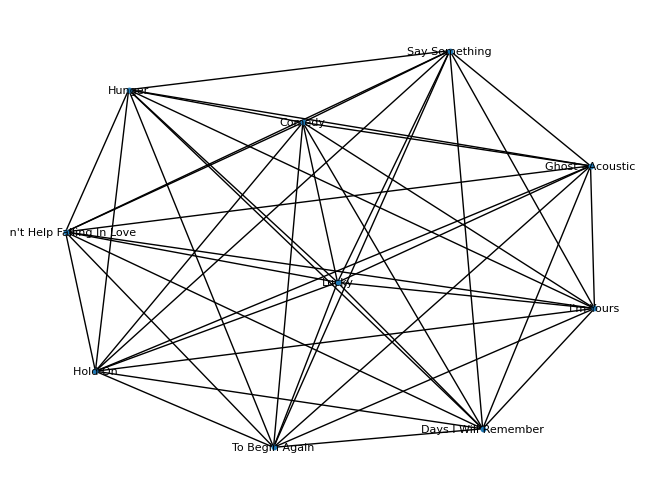

In [62]:
# Select relevant attributes (you can adjust this based on your dataset)
attributes = ['danceability','popularity']
song_data = df[attributes].values

# Calculate pairwise cosine similarity between songs based on attributes
similarities = cosine_similarity(song_data)

# Create a NetworkX graph
G = nx.Graph()

# Add nodes (songs) to the graph
for idx, row in df.iterrows():
    G.add_node(row['track_id'], name=row['track_name'])

# Add edges (similarity) between songs
num_songs = len(similarities)
for i in range(num_songs):
    for j in range(i + 1, num_songs):
        similarity_score = similarities[i][j]
        if similarity_score > 0.6:  # Adjust the threshold as needed
            G.add_edge(df.iloc[i]['track_id'], df.iloc[j]['track_id'], weight=similarity_score)

#  Visualize the network (requires additional libraries)
pos = nx.spring_layout(G)
labels = {n: G.nodes[n]['name'] for n in G.nodes}
nx.draw(G, pos, labels=labels, node_size=10, font_size=8)
plt.show()

# Now, G is your song-based recommendation network.


In [63]:

##### Recommendation based on user input of a song id

# Specify the seed song by its track_id (you can change this)
seed_song_id = "1iJBSr7s7jYXzM8EGcbK5b"

# Find neighbors of the seed song in the network
neighbors = list(G.neighbors(seed_song_id))

# Sort neighbors by edge weight (similarity score) in descending order
sorted_neighbors = sorted(neighbors, key=lambda neighbor: G[seed_song_id][neighbor]['weight'], reverse=True)

# Get the top N recommendations
N = 10  # Number of recommendations to generate
recommendations = sorted_neighbors[:N]

# Print or return the recommendations (you can access the song attributes from your dataset)
for recommendation in recommendations:
    # Access song attributes from your dataset using 'recommendation' (e.g., df[df['track_id'] == recommendation]['track_name'])
    print(f"Song ID: {recommendation}")
    print(f"Song name: {df[df['track_id'] == recommendation]['track_name'].values[0]}")
    print(f"Artist: {df[df['track_id'] == recommendation]['artists'].values[0]}")

    print("---------------------")


Song ID: 4qPNDBW1i3p13qLCt0Ki3A
Song name: Ghost - Acoustic
Artist: Ben Woodward
---------------------
Song ID: 5vjLSffimiIP26QG5WcN2K
Song name: Hold On
Artist: Chord Overstreet
---------------------
Song ID: 7k9GuJYLp2AzqokyEdwEw2
Song name: Hunger
Artist: Ross Copperman
---------------------
Song ID: 0IktbUcnAGrvD03AWnz3Q8
Song name: Lucky
Artist: Jason Mraz;Colbie Caillat
---------------------
Song ID: 1EzrEOXmMH3G43AXT1y7pA
Song name: I'm Yours
Artist: Jason Mraz
---------------------
Song ID: 5SuOikwiRyPMVoIQDJUgSV
Song name: Comedy
Artist: Gen Hoshino
---------------------
Song ID: 6Vc5wAMmXdKIAM7WUoEb7N
Song name: Say Something
Artist: A Great Big World;Christina Aguilera
---------------------
Song ID: 6lfxq3CG4xtTiEg7opyCyx
Song name: Can't Help Falling In Love
Artist: Kina Grannis
---------------------
Song ID: 01MVOl9KtVTNfFiBU9I7dc
Song name: Days I Will Remember
Artist: Tyrone Wells
---------------------


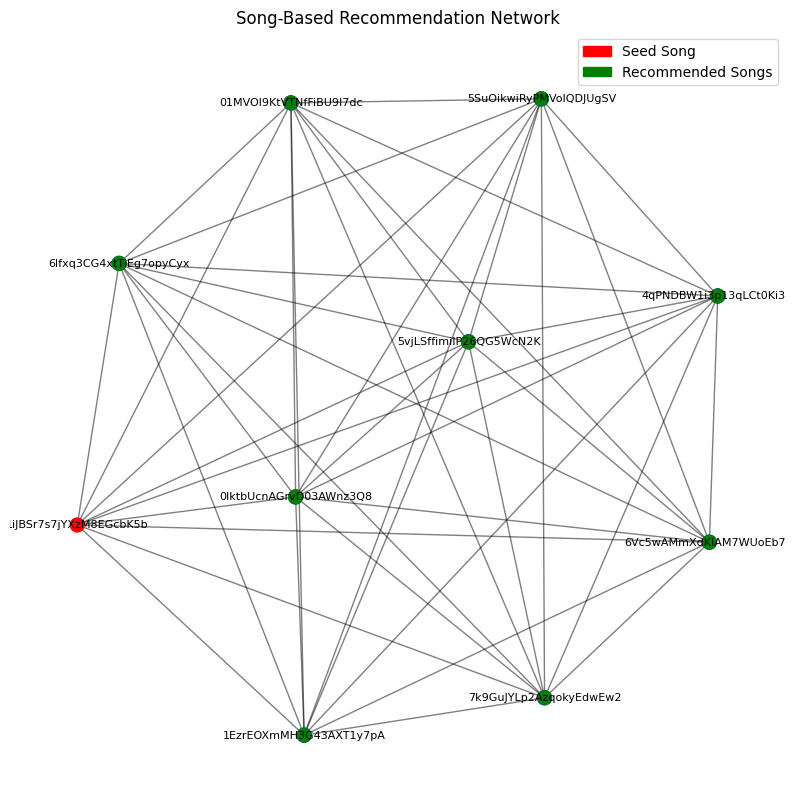

In [68]:
import matplotlib.pyplot as plt

# Assuming you have already created the NetworkX graph 'G' and calculated recommendations

# Create a layout for the graph (you can use different layouts based on your preference)
pos = nx.spring_layout(G, seed=42)

# Create a dictionary to store node colors
node_colors = {node: 'blue' for node in G.nodes()}  # Set all nodes to blue initially

# Highlight the seed song node in red
node_colors[seed_song_id] = 'red'

# Create a list of colors for the recommended songs (you can choose a different color)
recommendation_colors = ['green'] * len(recommendations)

# Create a figure and draw the graph with node colors
plt.figure(figsize=(10, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=100)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Highlight the recommended songs with a different color
nx.draw_networkx_nodes(G, pos, nodelist=recommendations, node_color=recommendation_colors, node_size=100)

# Add a legend
import matplotlib.patches as mpatches

legend_labels = [mpatches.Patch(color='red', label='Seed Song'),
                 mpatches.Patch(color='green', label='Recommended Songs')]

plt.legend(handles=legend_labels, loc='upper right')

# Show the plot
plt.title('Song-Based Recommendation Network')
plt.axis('off')
plt.show()


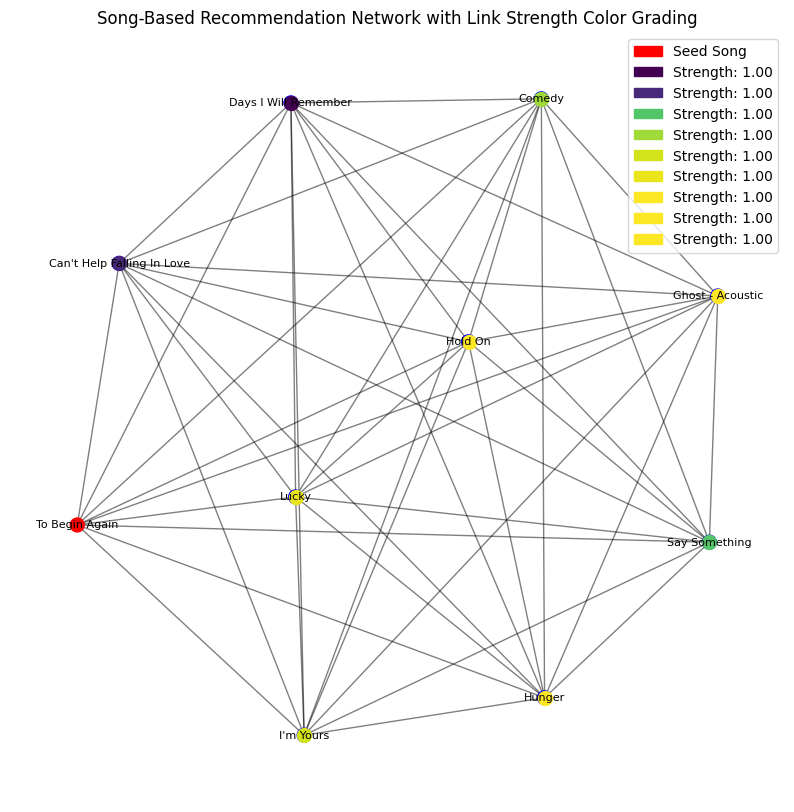

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already created the NetworkX graph 'G' and calculated recommendations

# Create a layout for the graph (you can use different layouts based on your preference)
pos = nx.spring_layout(G, seed=42)

# Create a dictionary to store node colors
node_colors = {node: 'blue' for node in G.nodes()}  # Set all nodes to blue initially

# Highlight the seed song node in red
node_colors[seed_song_id] = 'red'

# Create a list of colors for the recommended songs based on edge weights
edge_weights = [G[seed_song_id][recommendation]['weight'] for recommendation in recommendations]

# Use a colormap to map edge weights to colors
cmap = plt.get_cmap('viridis')  # You can choose a different colormap
norm = plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))

# Create a figure and draw the graph with node colors
plt.figure(figsize=(10, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=100)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels
song_names = {node: df[df['track_id'] == node]['track_name'].values[0] for node in G.nodes()}
nx.draw_networkx_labels(G, pos,labels=song_names, font_size=8)

# Highlight the recommended songs with colors based on edge weights
for i, recommendation in enumerate(recommendations):
    recommendation_color = cmap(norm(edge_weights[i]))
    nx.draw_networkx_nodes(G, pos, nodelist=[recommendation], node_color=[recommendation_color], node_size=100)

# Add a legend
import matplotlib.patches as mpatches

legend_labels = [mpatches.Patch(color='red', label='Seed Song')]

# Create a color legend based on edge weights
for weight in sorted(edge_weights):
    color = cmap(norm(weight))
    label = f'Strength: {weight:.2f}'
    legend_labels.append(mpatches.Patch(color=color, label=label))

plt.legend(handles=legend_labels, loc='upper right')

# Show the plot
plt.title('Song-Based Recommendation Network with Link Strength Color Grading')
plt.axis('off')
plt.show()


## Song-based recommendation system based on K-means clustering

In [10]:
# Select numerical features only for  the k-means algorithm
features= df.drop(columns={'track_id', 'artists','album_name','track_name'})
features

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,1.782624,0.024557,0.629239,-0.717147,1,0.300825,0,0.551843,-0.850193,-0.504111,...,0,0,0,0,0,0,0,0,1,0
1,0.975625,-0.730889,-0.845908,-1.889974,1,-1.784739,1,-0.078995,1.831744,-0.504097,...,0,0,0,0,0,0,0,0,1,0
2,1.065291,-0.160353,-0.742187,-1.122667,0,-0.293289,1,-0.273827,-0.315489,-0.504115,...,0,0,0,0,0,0,0,0,1,0
3,1.692957,-0.243236,-1.733301,-2.312987,0,-2.039246,1,-0.457309,1.774605,-0.503886,...,0,0,0,0,0,0,0,1,0,0
4,2.186123,-0.271942,0.295026,-0.788709,2,-0.282751,1,-0.303146,0.463409,-0.504115,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.548707,1.462948,-2.274956,-1.615652,5,-1.617321,1,-0.401507,0.977663,2.493742,...,0,0,0,0,0,1,0,0,0,1
113996,-0.503873,1.462957,-2.263432,-2.084782,0,-2.000075,0,-0.421369,2.042258,2.648803,...,0,0,0,0,0,1,0,0,1,0
113997,-0.503873,0.404815,0.358411,-1.241937,0,-0.524135,0,-0.403399,1.660327,-0.504115,...,0,0,0,0,0,1,0,0,1,0
113998,0.347959,0.520635,0.116395,-0.538241,7,-0.522942,1,-0.519731,0.198764,-0.504115,...,0,0,0,0,0,1,0,0,1,0


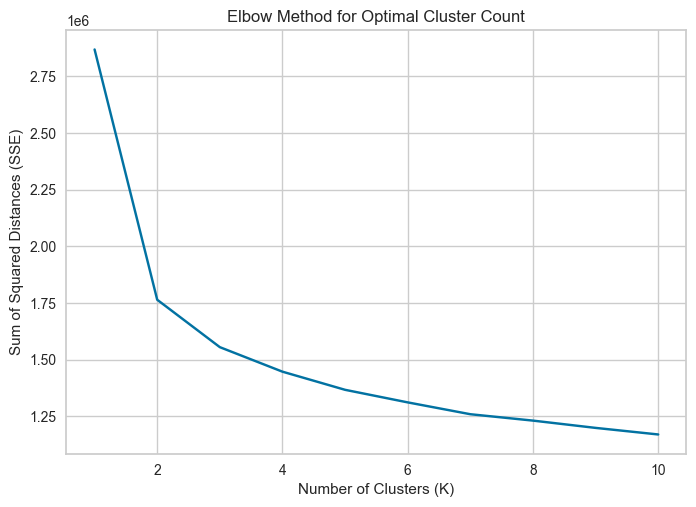

In [11]:
kmeans = KMeans()
ssd = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(features)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Distances (SSE)")
plt.title("Elbow Method for Optimal Cluster Count")
plt.show(block=True)

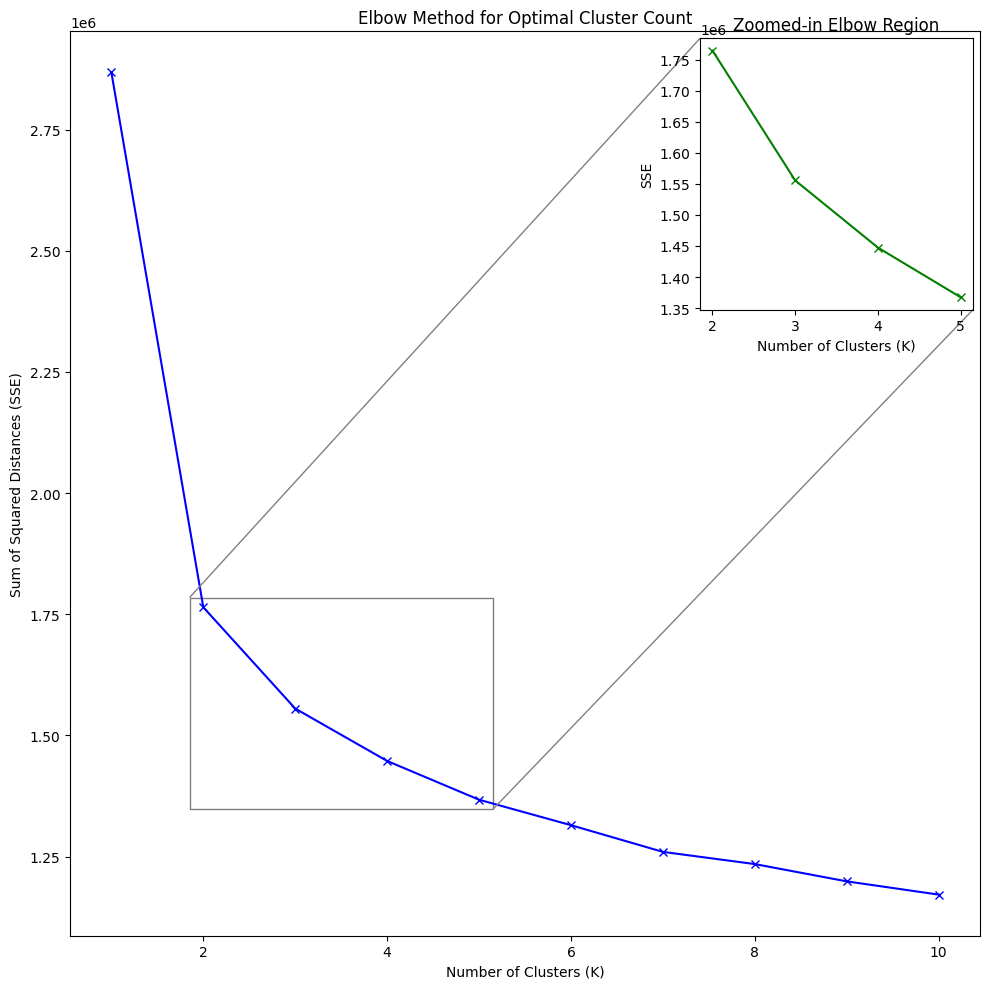

In [159]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition, mark_inset


# Calculate SSE for different values of K
kmeans = KMeans()
ssd = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(features)
    ssd.append(kmeans.inertia_)

# Create the main plot
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(K, ssd, "bx-")
ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Sum of Squared Distances (SSE)")
ax1.set_title("Elbow Method for Optimal Cluster Count")

# Create an inset plot
axins = inset_axes(ax1, width="30%", height="30%", loc="upper right")
axins.plot(K[1:5], ssd[1:5], "gx-")  # Adjust the range 
axins.set_xlabel("Number of Clusters (K)")
axins.set_ylabel("SSE")
axins.set_title("Zoomed-in Elbow Region")
mark_inset(ax1, axins,loc1=2, loc2=4, fc="none", ec='0.5')
plt.tight_layout() 
plt.show()

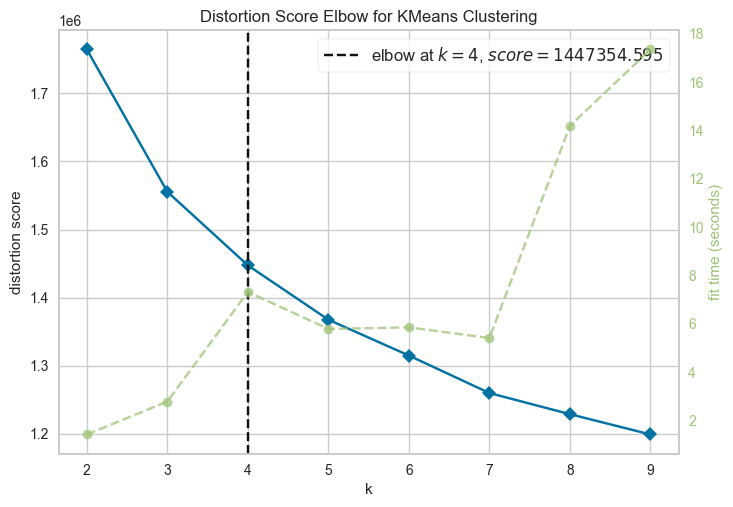

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(features)
visualizer.show()

In [12]:
# Perform K-means clustering with the K selected by the elbow-method
k = 4  
our_kmeans= KMeans(n_clusters=k, random_state=0).fit(features)

# Assign cluster labels to each song in the dataset
df['cluster_label'] = our_kmeans.labels_

# Now, let's assume the user inputs a seed song (you can change this)
seed_song_id = '1iJBSr7s7jYXzM8EGcbK5b'

# Find the cluster label of the seed song
seed_song_cluster = df[df['track_id'] == seed_song_id]['cluster_label'].values[0]

# Get the indices of all songs in the same cluster as the seed song
cluster_indices = df[df['cluster_label'] == seed_song_cluster].index

# Specify the number of random recommendations you want from the same cluster
num_random_recommendations = 5

# Ensure that the number of random recommendations does not exceed the number of songs in the cluster
num_random_recommendations = min(num_random_recommendations, len(cluster_indices))

# Randomly select songs from the same cluster
random_recommendations = random.sample(cluster_indices.tolist(), num_random_recommendations)

# Retrieve the corresponding track_ids of the random recommendations
random_recommendation_track_ids = [df['track_id'].iloc[i] for i in random_recommendations]


# Retrieve the corresponding track_ids and track names of the random recommendations
seed_song_name = df[df['track_id'] == seed_song_id]['track_name'].values[0]
seed_artist_name = df[df['track_id'] == seed_song_id]['artists'].values[0]
print(f"Seed Song: {seed_song_name}\n")
print(f"Seed Song Artist: {seed_artist_name}\n")
print("-------------------------------------------")

print("5 Recommendations from the same cluster:")
# Print or return the random recommendations
for recommendation_id in random_recommendation_track_ids:
    song_name = df[df['track_id'] == recommendation_id]['track_name'].values[0]
    artist_name = df[df['track_id'] == recommendation_id]['artists'].values[0]
    print(f"Song ID: {recommendation_id}")
    print(f"Song Name: {song_name}")
    print(f"Artist: {artist_name}")
    print("---------------------")

Seed Song: To Begin Again

Seed Song Artist: Ingrid Michaelson;ZAYN

-------------------------------------------
5 Recommendations from the same cluster:
Song ID: 5ensvgiXtnthwLwwkdzq4G
Song Name: Steady As The Beating Drum (Main Title)
Artist: Music Creation
---------------------
Song ID: 4MLBqAEzNN89o2M9h92Z26
Song Name: Get Back - Remastered 2009
Artist: The Beatles
---------------------
Song ID: 7fpvBXWplUDFqQikcG5woL
Song Name: I Don't Smoke - Deekline & Ed Solo vs System Remix
Artist: Deekline
---------------------
Song ID: 4sgQHkppFQrWhAjoQszici
Song Name: Goin' Steady
Artist: Faron Young
---------------------
Song ID: 3AHzNfksnT7en2Ir8sIUc9
Song Name: Speed King
Artist: Röyksopp
---------------------


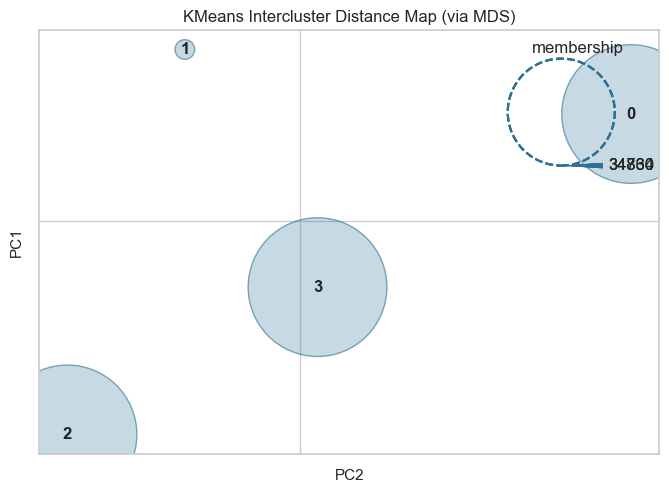

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(our_kmeans,legend_loc="upper right",min_size=200, max_size=10000)

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### sizing according to membership: so the bigger the cluster the bigger number of instances it contains

In [13]:
import tkinter as tk
from tkinter import messagebox, ttk
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import random

# Perform K-means clustering
k = 5  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=k, random_state=0).fit(features)

# Assign cluster labels to each song in the dataset
df['cluster_label'] = kmeans.labels_

# Function to handle the recommendation process
def recommend_songs():
    # Get the user input from the entry field or dropdown menu
    if entry.get():
        seed_song_name = entry.get()
    else:
        seed_song_name = dropdown.get()
    
    # Find the cluster label of the seed song
    try:
        seed_song_cluster = df[df['track_name'] == seed_song_name]['cluster_label'].values[0]
    except IndexError:
        messagebox.showerror("Error", "Song not found in the dataset.")
        return

    # Get the indices of all songs in the same cluster as the seed song
    cluster_indices = df[df['cluster_label'] == seed_song_cluster].index

    # Specify the number of random recommendations you want from the same cluster
    num_random_recommendations = 5

    # Ensure that the number of random recommendations does not exceed the number of songs in the cluster
    num_random_recommendations = min(num_random_recommendations, len(cluster_indices))

    # Randomly select songs from the same cluster
    random_recommendations = random.sample(cluster_indices.tolist(), num_random_recommendations)

    # Retrieve the corresponding track names and artists of the random recommendations
    random_recommendation_track_names = [df['track_name'].iloc[i] for i in random_recommendations]
    random_recommendation_artists = [df['artists'].iloc[i] for i in random_recommendations]
    
    # Display the recommendations in a message box
    recommendations_text = ""
    for name, artists in zip(random_recommendation_track_names, random_recommendation_artists):
        recommendations_text += f"Track Name: {name}\nArtist: {artists}\n\n"
    messagebox.showinfo("Recommendations", recommendations_text)

# Create the main application window
app = tk.Tk()
app.title("Song Recommendation System")

# Create a label and an entry field for entering the seed song name
label = tk.Label(app, text="Enter Seed Song Name:")
label.pack()
entry = tk.Entry(app)
entry.pack()

# Create a label and a dropdown menu with randomly selected example song track names and artists
example_label = tk.Label(app, text="Or select an example:")
example_label.pack()

# Randomly select three songs and their artists from the dataset
random_examples = df.sample(n=3)
example_song_names = random_examples['track_name'].tolist()
example_artists = random_examples['artists'].tolist()

# Create a dropdown menu for selecting example songs
dropdown = ttk.Combobox(app, values=example_song_names)
dropdown.pack()

# Create a button to trigger the recommendation process
button = tk.Button(app, text="Recommend Songs", command=recommend_songs)
button.pack()

# Start the Tkinter main loop
app.mainloop()


2023-10-10 22:11:05.990 Python[79372:4418153] Warning: Expected min height of view: (<NSButton: 0x7fa2ac7d5dc0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2023-10-10 22:14:18.800 Python[79372:4418153] Warning: Expected min height of view: (<NSButton: 0x7fa2ad270dc0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


In [15]:
# Plot histograms of features for the 5 random recommended songs
plt.figure(figsize=(12, 8))
for i, track_name in enumerate(random_recommendation_track_names):
    track_features = df[df['track_name'] == track_name][['acousticness', 'danceability', 'energy']]
    plt.subplot(2, 3, i + 1)
    plt.hist(track_features.values[0], bins=20, alpha=0.7)
    plt.title(f"{track_name} Features")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

NameError: name 'random_recommendation_track_names' is not defined

<Figure size 1200x800 with 0 Axes>